In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

________________________________________________________________________________

### Import Libraries 

In [7]:
!pip install surprise


[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os
import pandas as pd
import numpy as np
import random
import torch
import torchtext
import scipy.sparse as sparse
from multiprocessing import Pool, cpu_count
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from gensim.utils import simple_preprocess
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from surprise import (
    Reader,
    Dataset,
    accuracy,
    NormalPredictor,
    KNNBasic,
    KNNWithMeans,
    KNNWithZScore,
    KNNBaseline,
    SVD,
    BaselineOnly,
    SVDpp,
    NMF,
    SlopeOne,
    CoClustering
)

from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

________________________________________________________________________________

### Load data 

In [38]:
# FolderPath = "/content/drive/MyDrive/Colab Notebooks/FIT5212/A2/Data"
FolderPath = "C:/Users/Sunny/Desktop/Master/Sem3/5212/A2/Data"

train_df = pd.read_csv(FolderPath + "/train.csv")
test_df = pd.read_csv(FolderPath + "/test.csv")
metadata_df = pd.read_csv(FolderPath + "/books_metadata.csv")

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286136 entries, 0 to 286135
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    286136 non-null  int64 
 1   item_id    286136 non-null  int64 
 2   rating     286136 non-null  int64 
 3   book_name  286136 non-null  object
dtypes: int64(3), object(1)
memory usage: 8.7+ MB


In [16]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636235 entries, 0 to 1636234
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Name            1636235 non-null  object 
 1   pagesNumber     718417 non-null   float64
 2   Publisher       1619540 non-null  object 
 3   CountsOfReview  1636235 non-null  int64  
 4   PublishYear     1636235 non-null  int64  
 5   Language        206442 non-null   object 
 6   Authors         1636235 non-null  object 
 7   Rating          1636235 non-null  float64
 8   item_id         44586 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 112.4+ MB


________________________________________________________________________________

# Memory based Algorithm comparison

In [20]:
reader = Reader()
data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', "MAE"], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

C:\Users\Sunny\AppData\Local\Temp\ipykernel_28236\2636614995.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\Sunny\AppData\Local\Temp\ipykernel_28236\2636614995.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\Sunny\AppData\Local\Temp\ipykernel_28236\2636614995.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\Sunny\AppData\Local\Temp\ipykernel_28236\2636614995.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\Sunny\AppData\Local\Temp\ipykernel_28236\2636614995.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\Sunny\AppData\Local\Temp\ipykernel_28236\2636614995.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\Sunny\AppData\Local\Temp\ipykernel_28236\2636614995.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


C:\Users\Sunny\AppData\Local\Temp\ipykernel_28236\2636614995.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


In [26]:
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
BaselineOnly,0.885800,0.706579,0.791227,0.491570
SVD,0.893184,0.708956,2.870429,0.456861
KNNBaseline,0.923082,0.726138,1.739796,3.167013
KNNWithZScore,0.951120,0.749206,1.227595,3.018960
KNNWithMeans,0.951184,0.751231,1.001780,2.885226
NMF,0.995599,0.791227,9.029701,0.450577
KNNBasic,1.000704,0.790562,0.914038,2.733662
NormalPredictor,1.341909,1.073049,0.340799,0.476726


________________________________________________________________________________

### Memory-based model 1 - BaselineOnly Model

In [37]:
reader = Reader()
data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)

# runing algo and get prediction results
algo = BaselineOnly()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
trainset = data.build_full_trainset()
algo.fit(trainset)
predicted_ratings = []
for index, row in train_df.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    prediction = algo.predict(user_id, item_id)
    predicted_ratings.append(prediction.est)


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286136 entries, 0 to 286135
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    286136 non-null  int64 
 1   item_id    286136 non-null  int64 
 2   rating     286136 non-null  int64 
 3   book_name  286136 non-null  object
dtypes: int64(3), object(1)
memory usage: 8.7+ MB


In [41]:
# Auxiliary function for evaluation
# Referenced: https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b

def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
# train_df.drop("book_name", axis = 1, inplace = True)
train_df["Prediction"] = predicted_ratings
train_df['ratings given by user'] = train_df.user_id.apply(get_Iu)
train_df['Count of ratings to item'] = train_df.item_id.apply(get_Ui)
train_df['error'] = abs(train_df.Prediction - train_df.rating)
best_predictions = train_df.sort_values(by='error')[:10]
worst_predictions = train_df.sort_values(by='error')[-10:]

In [42]:
best_predictions

,user_id,item_id,rating,Prediction,ratings given by user,Count of ratings to item,error
243416,3140,29732,5,5.0,44,19,0.0
235503,2329,3318,5,5.0,272,45,0.0
20357,198,8534,5,5.0,236,33,0.0
20358,198,77,5,5.0,236,138,0.0
20363,198,5160,5,5.0,236,29,0.0
20368,198,5748,5,5.0,236,108,0.0
20369,198,1856,5,5.0,236,53,0.0
190756,1919,1030,5,5.0,203,105,0.0
20380,198,1891,5,5.0,236,410,0.0
20381,198,672,5,5.0,236,36,0.0


In [43]:
worst_predictions

,user_id,item_id,rating,Prediction,ratings given by user,Count of ratings to item,error
191723,2671,4041,1,4.516458,107,141,3.516458
76300,748,153,1,4.530973,68,800,3.530973
173001,1812,105,1,4.573162,157,105,3.573162
106051,1121,242,1,4.584115,14,303,3.584115
198508,2027,80,1,4.646298,55,203,3.646298
557,4,529,1,4.654988,572,105,3.654988
225681,2572,7493,1,4.673786,31,41,3.673786
173622,1817,1282,1,4.719716,91,444,3.719716
88342,852,12479,1,4.756892,113,15,3.756892
101911,1284,1282,1,4.840028,50,444,3.840028


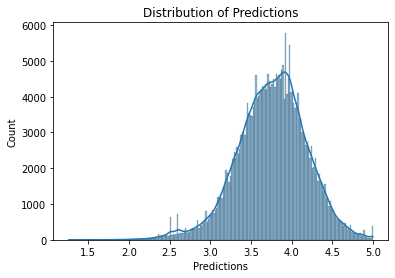

In [45]:
# Assuming train_df is your DataFrame with a column named "Predictions"
predictions = train_df["Prediction"]

# Plotting the distribution
sns.histplot(predictions, kde=True)
plt.title("Distribution of Predictions")
plt.xlabel("Predictions")
plt.ylabel("Count")
plt.show()

In [ ]:
predicted_ratings = []
for index, row in test_df.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    prediction = algo.predict(user_id, item_id)
    predicted_ratings.append(prediction.est)


In [28]:
test_df = pd.read_csv(FolderPath + "/test.csv")
test_df["rating"] = predicted_ratings

In [19]:
# test_df[["ID", "rating"]].to_csv(FolderPath + "/baselineOnly.csv", index = False)

________________________________________________________________________________

### SVD Model - combination of parameters

In [35]:
# # 0.69876
# # 0.8147 when convert to int

# test_df.rename(columns = {"SVD_rating": "rating"}, inplace = True)
# test_df[["ID", "rating"]].to_csv(FolderPath + "basic_200_0.001.csv", index = False)

In [46]:
train_df = pd.read_csv(FolderPath + "/train.csv")
test_df = pd.read_csv(FolderPath + "/test.csv")

In [47]:
reader = Reader()
data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)

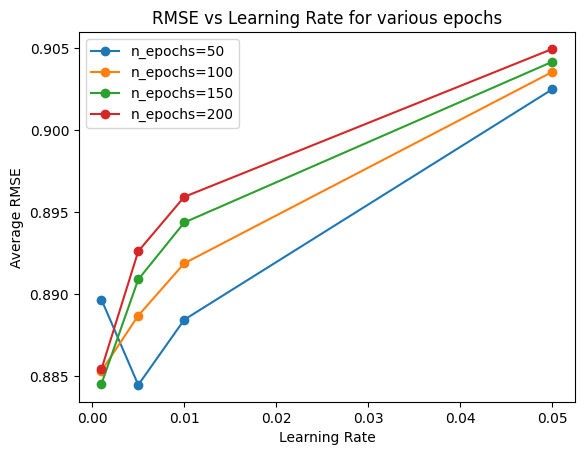

In [ ]:
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import cross_validate, KFold

# Load your dataset here
# data = Dataset.load_builtin('ml-100k')

n_epochs = [50, 100, 150, 200]
lr_all = [0.001, 0.005, 0.01, 0.05]
reg_all = 0.1

avg_rmses = []

for epoch in n_epochs:
    temp_rmses = []
    for lr in lr_all:
        algo = SVD(n_epochs=epoch, lr_all=lr, reg_all=reg_all, random_state=SEED)
        cv = cross_validate(algo, data, measures=['RMSE'], cv=5)
        temp_rmses.append(np.mean(cv['test_rmse']))
    avg_rmses.append(temp_rmses)

# Plotting
for i, rmses in enumerate(avg_rmses):
    plt.plot(lr_all, rmses, marker='o', label=f'n_epochs={n_epochs[i]}')

plt.title('RMSE vs Learning Rate for various epochs')
plt.xlabel('Learning Rate')
plt.ylabel('Average RMSE')
plt.legend()
plt.show()

In [38]:
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import cross_validate, KFold

# Load your dataset here
# data = Dataset.load_builtin('ml-100k')

n_epochs = [50, 100, 150, 200]
lr_all = [0.001, 0.005, 0.01, 0.05]
reg_all = 0.1
SEED = 2  # set your random state seed here

avg_maes = []

for epoch in n_epochs:
    temp_maes = []
    for lr in lr_all:
        algo = SVD(n_epochs=epoch, lr_all=lr, reg_all=reg_all, random_state=SEED)
        cv = cross_validate(algo, data, measures=['MAE'], cv=5)
        temp_maes.append(np.mean(cv['test_mae']))
    avg_maes.append(temp_maes)

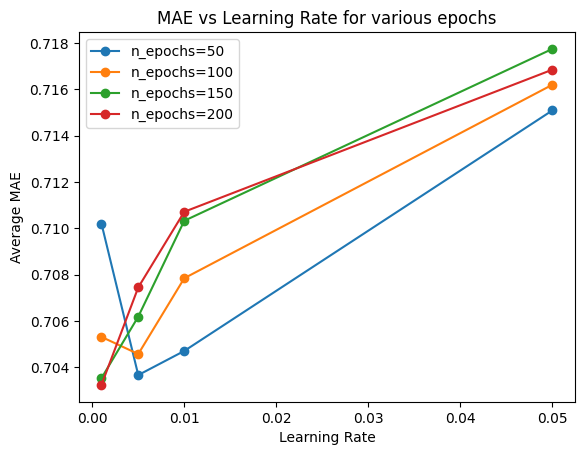

In [41]:
# Plot MAE
for i, maes in enumerate(avg_maes):
    plt.plot(lr_all, maes, marker='o', label=f'n_epochs={n_epochs[i]}')

plt.title('MAE vs Learning Rate for various epochs')
plt.xlabel('Learning Rate')
plt.ylabel('Average MAE')
plt.legend()
plt.show()

________________________________________________________________________________

## SVD - Best lr and epoch combinations

### Best combination 1 - lr = 0.005, epochs = 50

In [15]:
n_epochs = 50
lr_all = 0.005
reg_all = 0.1

algo = SVD(n_epochs = n_epochs, lr_all = lr_all, reg_all = reg_all, random_state = SEED)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8881  0.8816  0.8849  0.8868  0.8818  0.8846  0.0026  
MAE (testset)     0.7053  0.6994  0.7038  0.7046  0.7027  0.7032  0.0021  
Fit time          11.08   11.13   11.12   9.75    10.41   10.70   0.54    
Test time         0.32    0.75    0.74    0.52    0.31    0.53    0.20    


{'test_rmse': array([0.88813367, 0.88158909, 0.88486001, 0.88677693, 0.8817828 ]),
 'test_mae': array([0.70532294, 0.69936276, 0.70378271, 0.70457476, 0.70274274]),
 'fit_time': (11.076048374176025,
  11.128887176513672,
  11.116327285766602,
  9.75194787979126,
  10.409369468688965),
 'test_time': (0.31511878967285156,
  0.7539904117584229,
  0.741586446762085,
  0.5155768394470215,
  0.3087186813354492)}

In [16]:
data = Dataset.load_from_df(train_df[['user_id', 'item_id', 'rating']], reader)
trainset = data.build_full_trainset()
algo.fit(trainset)
predicted_ratings = []
for index, row in test_df.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    prediction = algo.predict(user_id, item_id)
    predicted_ratings.append(prediction.est)


In [17]:
test_df["SVD_rating"] = predicted_ratings

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56199 entries, 0 to 56198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          56199 non-null  int64  
 1   user_id     56199 non-null  int64  
 2   item_id     56199 non-null  int64  
 3   book_name   56199 non-null  object 
 4   SVD_rating  56199 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


In [19]:
# 0.69905
test_df.rename(columns = {"SVD_rating": "rating"}, inplace = True)
test_df[["ID", "rating"]].to_csv(FolderPath + "basic_50_0.005.csv", index = False)

________________________________________________________________________________

### Best combination 2 - lr = 0.001, epochs = 150

In [20]:
n_epochs = 150
lr_all = 0.001
reg_all = 0.1

algo = SVD(n_epochs = n_epochs, lr_all = lr_all, reg_all = reg_all, random_state = SEED)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8858  0.8902  0.8830  0.8811  0.8828  0.8846  0.0032  
MAE (testset)     0.7056  0.7087  0.7013  0.7002  0.7026  0.7037  0.0031  
Fit time          29.40   31.80   32.59   30.16   28.68   30.53   1.46    
Test time         0.30    0.83    0.34    0.65    0.31    0.49    0.22    


{'test_rmse': array([0.88577722, 0.89023151, 0.88296002, 0.88105006, 0.88275615]),
 'test_mae': array([0.70563992, 0.70868   , 0.70133612, 0.70018968, 0.70259332]),
 'fit_time': (29.4030339717865,
  31.796489477157593,
  32.589377880096436,
  30.155160665512085,
  28.6817045211792),
 'test_time': (0.29782843589782715,
  0.8331320285797119,
  0.3444499969482422,
  0.652571439743042,
  0.31490564346313477)}

In [21]:
trainset = data.build_full_trainset()
algo.fit(trainset)
predicted_ratings = []
for index, row in test_df.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    prediction = algo.predict(user_id, item_id)
    predicted_ratings.append(prediction.est)


In [22]:
test_df["SVD_rating"] = predicted_ratings

In [23]:
# 0.70033
test_df.rename(columns = {"SVD_rating": "rating"}, inplace = True)
test_df[["ID", "rating"]].to_csv(FolderPath + "basic_150_0.001.csv", index = False)

________________________________________________________________________________

### Best combination 3 - lr = 0.001, epochs = 200

In [48]:
test_df = pd.read_csv(FolderPath + "/test.csv")

In [49]:
n_epochs = 200
lr_all = 0.001
reg_all = 0.1

algo = SVD(n_epochs = n_epochs, lr_all = lr_all, reg_all = reg_all, random_state = SEED)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8829  0.8799  0.8868  0.8888  0.8876  0.8852  0.0033  
MAE (testset)     0.7019  0.6986  0.7059  0.7067  0.7043  0.7035  0.0029  
Fit time          26.30   27.25   26.70   26.33   26.27   26.57   0.38    
Test time         0.57    0.59    0.57    0.57    0.57    0.57    0.01    


{'test_rmse': array([0.88286576, 0.87985648, 0.88682733, 0.88875413, 0.88763935]),
 'test_mae': array([0.7018928 , 0.69863268, 0.70588944, 0.70672107, 0.70429611]),
 'fit_time': (26.296306848526,
  27.251811504364014,
  26.70237398147583,
  26.327537059783936,
  26.268176078796387),
 'test_time': (0.571061372756958,
  0.5878851413726807,
  0.5723822116851807,
  0.5656390190124512,
  0.5664620399475098)}

In [50]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [54]:
predicted_ratings = []
for index, row in train_df.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    prediction = algo.predict(user_id, item_id)
    predicted_ratings.append(prediction.est)

In [55]:
train_df["Prediction"] = predicted_ratings
train_df['ratings given by user'] = train_df.user_id.apply(get_Iu)
train_df['Count of ratings to item'] = train_df.item_id.apply(get_Ui)
train_df['error'] = abs(train_df.Prediction - train_df.rating)
best_predictions = train_df.sort_values(by='error')[:10]
worst_predictions = train_df.sort_values(by='error')[-10:]

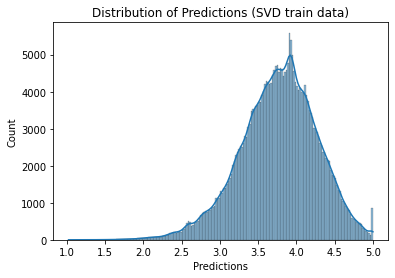

In [59]:
# Plotting the distribution
sns.histplot(predicted_ratings, kde=True)
plt.title("Distribution of Predictions (SVD train data)")
plt.xlabel("Predictions")
plt.ylabel("Count")
plt.show()

In [56]:
best_predictions

,user_id,item_id,rating,book_name,Prediction,ratings given by user,Count of ratings to item,error
15007,150,4419,5,The Autobiography of Malcolm X,5.0,103,33,0.0
270352,1908,40132,5,Because They Wanted To,5.0,218,10,0.0
49028,666,21937,5,طاعون,5.0,43,26,0.0
190433,2089,1655,5,Just Mercy: A Story of Justice and Redemption,5.0,176,36,0.0
266055,3142,16775,5,"White Night (The Dresden Files, #9)",5.0,19,12,0.0
6237,80,4280,5,"Fables & Reflections (The Sandman, #6)",5.0,62,34,0.0
76860,735,11762,5,Thus Spake Zarathustra: A Book for All and None,5.0,593,18,0.0
42853,555,303,5,Harry Potter and the Goblet of Fire (Harry Pot...,5.0,78,523,0.0
49074,666,21952,5,تاریخ فلسفه,5.0,43,14,0.0
108811,1262,7493,5,Labyrinths: Selected Stories and Other Writings,5.0,215,41,0.0


In [57]:
worst_predictions

,user_id,item_id,rating,book_name,Prediction,ratings given by user,Count of ratings to item,error
104661,998,602,1,The Time Traveler's Wife,4.312810,581,349,3.312810
37027,384,242,1,The Little Prince,4.364974,252,303,3.364974
100397,998,3068,1,The Poisonwood Bible,4.375210,581,215,3.375210
106712,998,1682,1,Skinny Legs and All,4.394681,581,46,3.394681
173001,1812,105,1,As I Lay Dying,4.406169,157,105,3.406169
173622,1817,1282,1,One Hundred Years of Solitude,4.456504,91,444,3.456504
88342,852,12479,1,The Selected Poems,4.459084,113,15,3.459084
557,4,529,1,"Dune (Dune Chronicles, #1)",4.467780,572,105,3.467780
198508,2027,80,1,Where the Sidewalk Ends,4.471670,55,203,3.471670
101911,1284,1282,1,One Hundred Years of Solitude,4.593474,50,444,3.593474


In [ ]:
predicted_ratings = []
for index, row in test_df.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    prediction = algo.predict(user_id, item_id)
    predicted_ratings.append(prediction.est)


In [52]:
test_df["SVD_rating"] = predicted_ratings

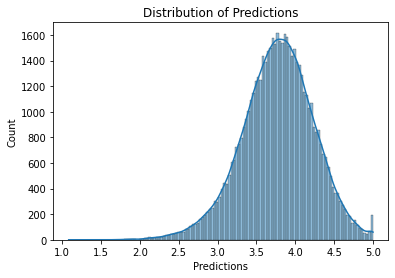

In [53]:
# Assuming train_df is your DataFrame with a column named "Predictions"
predictions = test_df["SVD_rating"]

# Plotting the distribution
sns.histplot(predictions, kde=True)
plt.title("Distribution of Predictions")
plt.xlabel("Predictions")
plt.ylabel("Count")
plt.show()

________________________________________________________________________________

# Model-based collaborative filtering

## Data Pre-processing (metadata)

In [60]:
metadata_df = metadata_df[~metadata_df["item_id"].isna()]
metadata_df.drop(["Name", "Publisher", "pagesNumber", "PublishYear"], axis = 1, inplace = True)

### Impute and preprocess Language

In [61]:
metadata_df.Language.value_counts()

eng      17494
en-US     2659
spa        669
en-GB      529
fre        302
ger        181
per         95
ita         29
por         22
mul         21
en-CA       13
rus          9
swe          7
jpn          7
nl           4
enm          4
grc          4
cat          3
zho          2
lat          2
pol          2
afr          2
gre          1
nor          1
dan          1
elx          1
gla          1
myn          1
kor          1
eus          1
frs          1
lit          1
ara          1
Name: Language, dtype: int64

In [62]:
# Grouping all english language into eng

metadata_df.loc[(metadata_df["Language"] == "en-US") | (metadata_df["Language"] == "en-GB")| (metadata_df["Language"] == "en-CA"), "Language"] = "eng"

In [63]:
# Impute lang values given that the author is known
author_language_mapping = metadata_df[metadata_df['Language'].notna()].groupby('Authors')['Language'].agg(pd.Series.mode).to_dict()

# author_language_mapping

In [64]:
from tqdm import tqdm

# Define a function to apply to the DataFrame
def impute_language(row):
    if pd.isnull(row['Language']) and row['Authors'] in author_language_mapping:
        return author_language_mapping[row['Authors']]
    else:
        return row['Language']

# Apply the function to the DataFrame with tqdm progress bar
def apply_impute_language(df):
    progress_bar = tqdm(total=len(df), desc="Imputing Language")
    def update_progress(*args):
        progress_bar.update()
    df['Language'] = df.apply(impute_language, axis=1)
    progress_bar.close()

# Call the function to apply the imputation with tqdm progress bar
apply_impute_language(metadata_df)


Imputing Language:   0%|          | 0/44586 [00:00<?, ?it/s]


In [65]:
# Impute rare languages
metadata_df["Language"].fillna("other", inplace = True)
# metadata_df.info()
language_counts = metadata_df['Language'].value_counts()

# If count of language is smaller than 50, impute them as "other"
rare_languages = language_counts[language_counts < 50].index
metadata_df.loc[metadata_df['Language'].isin(rare_languages), 'Language'] = 'other'

In [66]:
metadata_df.Language.value_counts()

eng      29832
other    13250
spa        821
fre        361
ger        216
per        106
Name: Language, dtype: int64

In [67]:
# Create a dictionary mapping each language to an integer based on its frequency
language_to_int = metadata_df['Language'].value_counts().to_dict()
language_to_int.pop('other', None)
ranked_languages = {k: rank for rank, k in enumerate(sorted(language_to_int, key=language_to_int.get, reverse=True), 1)}

# Add 'other' to the dictionary with rank 0
ranked_languages['other'] = 0
# Map the languages in the 'Language' column to their corresponding integer
metadata_df['Language_cat'] = metadata_df['Language'].map(ranked_languages)


In [68]:
metadata_df[["Language", "Language_cat"]]

,Language,Language_cat
0,eng,1
1,eng,1
2,eng,1
3,eng,1
4,eng,1
...,...,...
1635748,other,0
1635934,eng,1
1635952,eng,1
1636048,other,0


________________________________________________________________________________

### AuthorBookCount

In [69]:
metadata_df['AuthorBookCount'] = metadata_df.groupby('Authors')['item_id'].transform('count')

### Put AuthorBookCount into category

In [70]:
# Create bins and put count into category corresponding to the range

quantile = 0.75
max_value = np.quantile(metadata_df.AuthorBookCount, quantile)
labels = np.arange(0,99)
value_list = np.linspace(0, int(max_value), 99).tolist()
value_list.append(np.inf)
len(labels), len(value_list)


(99, 100)

In [71]:
# Apply bins and label to AuthorBookCount

metadata_df["AuthorCountCat"] = pd.cut(metadata_df['AuthorBookCount'], value_list, right=False, labels=labels)

________________________________________________________________________________

### Put CountOfReview into category

In [72]:
# Create bins and put count into category corresponding to the range

quantile = 0.75
max_value = np.quantile(metadata_df.CountsOfReview, quantile)
labels = np.arange(0,99)
value_list = np.linspace(0, int(max_value), 99).tolist()
value_list.append(np.inf)
len(labels), len(value_list)

(99, 100)

In [73]:
# Apply bins and label to ReviewCountCat

metadata_df["ReviewCountCat"] = pd.cut(metadata_df['CountsOfReview'], value_list, right=False, labels=labels)

In [74]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44586 entries, 0 to 1636104
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CountsOfReview   44586 non-null  int64   
 1   Language         44586 non-null  object  
 2   Authors          44586 non-null  object  
 3   Rating           44586 non-null  float64 
 4   item_id          44586 non-null  float64 
 5   Language_cat     44586 non-null  int64   
 6   AuthorBookCount  44586 non-null  int64   
 7   AuthorCountCat   44586 non-null  category
 8   ReviewCountCat   44586 non-null  category
dtypes: category(2), float64(2), int64(3), object(2)
memory usage: 2.8+ MB


________________________________________________________________________________

### Merging metadata to train df

In [75]:
def merge_metadata(metadata_df, other_df):
    df = pd.merge(other_df, metadata_df, how = 'left', on = "item_id")
    df["AuthorBookCount"].fillna(0, inplace = True)
    df.drop(["Authors", "Language"], axis = 1, inplace = True)
    df["Rating"].fillna(0, inplace = True)
    df["CountsOfReview"].fillna(0, inplace = True)
    df["Language_cat"].fillna(0, inplace = True)
    df.fillna(0, inplace = True)
    return df

# train_df = merge_metadata(metadata_df, train_df)

________________________________________________________________________________

# Implementation of basic neural network

Metadata was not applied in this model

In [76]:
num_users = len(train_df.user_id.unique())
num_items = len(train_df.item_id.unique())
print(num_users, num_items) 

test_num_users = len(test_df.user_id.unique())
test_num_items = len(test_df.item_id.unique())
print(test_num_users, test_num_items) 


4154 89030
2990 18792


In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [78]:
# Basic MF NN

class MF_bias(nn.Module):
    def __init__(self, num_users, num_items, emb_size=100):
        super(MF_bias, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.user_bias = nn.Embedding(num_users, 1)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.item_bias = nn.Embedding(num_items, 1)
        self.user_emb.weight.data.uniform_(0,0.05)
        self.item_emb.weight.data.uniform_(0,0.05)
        self.user_bias.weight.data.uniform_(-0.01,0.01)
        self.item_bias.weight.data.uniform_(-0.01,0.01)
        
    def forward(self, u, v):
        U = self.user_emb(u)
        V = self.item_emb(v)
        b_u = self.user_bias(u).squeeze()
        b_v = self.item_bias(v).squeeze()
        return (U*V).sum(1) +  b_u  + b_v

In [79]:
# train loop

def train_epochs(model, train_df, epochs=10, lr=0.01, wd=0.0, unsqueeze=False):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    model.train()
    for i in range(epochs):
        users = torch.LongTensor(train_df.user_id.values).cuda()
        items = torch.LongTensor(train_df.item_id.values).cuda()
        ratings = torch.FloatTensor(train_df.rating.values).cuda()
        if unsqueeze:
            ratings = ratings.unsqueeze(1)
        y_hat = model(users, items)
        loss = F.mse_loss(y_hat, ratings)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"epochs: {i+1}: loss: {round(loss.item(), 5)}") 
    
        MAX = max(y_hat.tolist())
        MIN = min(y_hat.tolist())

        # Normalizing result back to the scale of 1 to 5
        scaled_y_hat = [value * 5 / MAX for value in y_hat]
        
    return scaled_y_hat

# predicted_ratings = train_epochs(model, train_df, epochs=20, lr=0.01, wd=1e-5, unsqueeze=False)


In [82]:
# Initiate model and train model

model = MF_bias(num_users, num_items, emb_size=100).cuda() # if you have a GPU

predicted_ratings = train_epochs(model, train_df, epochs=20, lr=0.01, wd=5e-5, unsqueeze=False)

epochs: 1: loss: 14.69031
epochs: 2: loss: 14.19984
epochs: 3: loss: 13.60515
epochs: 4: loss: 12.9038
epochs: 5: loss: 12.09988
epochs: 6: loss: 11.20345
epochs: 7: loss: 10.23036
epochs: 8: loss: 9.20135
epochs: 9: loss: 8.14072
epochs: 10: loss: 7.07593
epochs: 11: loss: 6.03755
epochs: 12: loss: 5.05858
epochs: 13: loss: 4.17275
epochs: 14: loss: 3.41181
epochs: 15: loss: 2.80186
epochs: 16: loss: 2.35893
epochs: 17: loss: 2.08447
epochs: 18: loss: 1.96201
epochs: 19: loss: 1.95731
epochs: 20: loss: 2.02381


In [ ]:
predicted_ratings_list = [tensor.item() for tensor in predicted_ratings]
# print(predicted_ratings_list)
train_df["Predictions"] = predicted_ratings_list

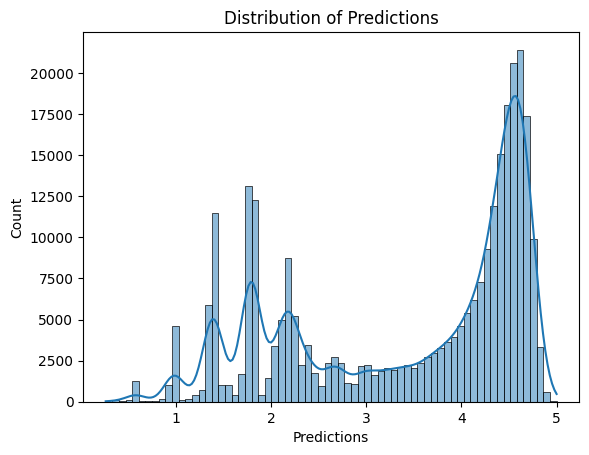

In [ ]:
# merge result to df
predictions = train_df["Predictions"]

# Plot the distribution
sns.histplot(predictions, kde=True)
plt.title("Distribution of Predictions")
plt.xlabel("Predictions")
plt.ylabel("Count")
plt.show()

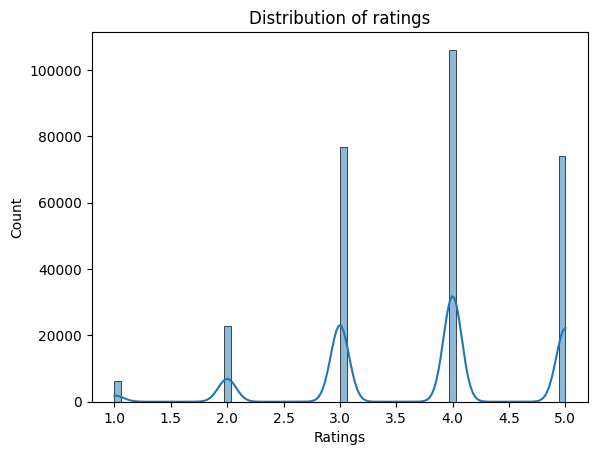

In [ ]:
# Assuming train_df is your DataFrame with a column named "Predictions"
ratings = train_df["rating"]

# Plotting the distribution
sns.histplot(ratings, kde=True)
plt.title("Distribution of ratings (Ground truth)")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


In [ ]:
# Test function

def test_model(model, test_data, train_data):
    model.eval()  # Set the model to evaluation mode

    # Filter test data based on available user and item IDs in training data
    valid_users = test_data.user_id.isin(train_data.user_id.unique())
    valid_items = test_data.item_id.isin(train_data.item_id.unique())
    filtered_test_data = test_data[valid_users & valid_items]

    users = torch.LongTensor(filtered_test_data.user_id.values)  
    items = torch.LongTensor(filtered_test_data.item_id.values)  

    with torch.no_grad():  
        y_hat = model(users, items)
    MAX = max(y_hat.tolist())
    MIN = min(y_hat.tolist())

    scaled_y_hat = [value * 5 / MAX for value in y_hat]
    return scaled_y_hat


pred = test_model(model, test_df, train_df)


In [ ]:
len(pred), len(test_df)


(56199, 56199)

In [ ]:
pred_list = [tensor.item() for tensor in pred]
test_df["rating"] = pred_list

In [ ]:
# Kaggle result: 1.0528

test_df[["ID", "rating"]].to_csv(FolderPath + "output.csv", index = False)

________________________________________________________________________________

# Implementation of Neural Network with features 

Metadata was taken into consideration

In [83]:
train_df_ = merge_metadata(metadata_df, train_df)
test_df_ = merge_metadata(metadata_df, test_df)

In [84]:
train_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286136 entries, 0 to 286135
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   user_id                   286136 non-null  int64   
 1   item_id                   286136 non-null  int64   
 2   rating                    286136 non-null  int64   
 3   book_name                 286136 non-null  object  
 4   Prediction                286136 non-null  float64 
 5   ratings given by user     286136 non-null  int64   
 6   Count of ratings to item  286136 non-null  int64   
 7   error                     286136 non-null  float64 
 8   CountsOfReview            286136 non-null  float64 
 9   Rating                    286136 non-null  float64 
 10  Language_cat              286136 non-null  float64 
 11  AuthorBookCount           286136 non-null  float64 
 12  AuthorCountCat            286136 non-null  category
 13  ReviewCountCat            286

In [85]:
class MFWithFeatures(nn.Module):
    def __init__(self, num_users, num_items, num_languages, num_popularity_groups, num_review_count_groups, emb_size=100):
        super(MFWithFeatures, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.language_emb = nn.Embedding(num_languages, emb_size)
        self.popularity_emb = nn.Embedding(num_popularity_groups, emb_size)
        self.review_emb = nn.Embedding(num_review_count_groups, emb_size)
        self.fc = nn.Linear(emb_size * 5, 1)
        
    def forward(self, u, v, lang, pop, rev):
        U = self.user_emb(u)
        V = self.item_emb(v)
        L = self.language_emb(lang)
        P = self.popularity_emb(pop)
        R = self.review_emb(rev)
        features = torch.cat([U, V, L, P, R], dim=1)
        pred = self.fc(features)
        pred = torch.sigmoid(pred) * 4 + 1 
        return pred



def train_epocs(model, df, epochs=20, lr=0.01, wd=0.0, unsqueeze=False):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    model.train()
    for i in range(epochs):
        users = torch.LongTensor(df.user_id.values)
        items = torch.LongTensor(df.item_id.values)
        languages = torch.LongTensor(df.Language_cat.values)
        popularity_groups = torch.LongTensor(df['AuthorCountRank'].values)
        review_count_groups = torch.LongTensor(df['ReviewCountRank'].values)
        ratings = torch.FloatTensor(df.rating.values)
        if unsqueeze:
            ratings = ratings.unsqueeze(1)
        y_hat = model(users, items, languages, popularity_groups, review_count_groups)
        loss = F.mse_loss(y_hat, ratings)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return y_hat

def test_model(model, test_data, train_data):
    model.eval()  # Set the model to evaluation mode

    # Filter test data based on available user and item IDs in training data
    valid_users = test_data.user_id.isin(train_data.user_id.unique())
    valid_items = test_data.item_id.isin(train_data.item_id.unique())
    filtered_test_data = test_data[valid_users & valid_items]

    users = torch.LongTensor(filtered_test_data.user_id.values)  # .cuda()
    items = torch.LongTensor(filtered_test_data.item_id.values)  # .cuda()

    with torch.no_grad():  
        y_hat = model(users, items)
    MAX = max(y_hat.tolist())
    MIN = min(y_hat.tolist())

    scaled_y_hat = [value * 5 / MAX for value in y_hat]
    return scaled_y_hat

In [86]:
train_df_['AuthorCountRank'] = pd.factorize(train_df_['AuthorCountCat'])[0]
train_df_['ReviewCountRank'] = pd.factorize(train_df_['ReviewCountCat'])[0]


In [87]:
num_users = len(train_df_.user_id.unique())
num_items = len(train_df_.item_id.unique())
num_languages = len(train_df_.Language_cat.unique())
num_AuthorCountRank = len(train_df_['AuthorCountRank'].unique())
num_ReviewCountRank = len(train_df_['ReviewCountRank'].unique())


print(num_users, num_items, num_languages, num_AuthorCountRank, num_ReviewCountRank)


4154 89030 6 13 99


In [89]:
train_df_['Language_cat'] = train_df_['Language_cat'].astype(int)
train_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286136 entries, 0 to 286135
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   user_id                   286136 non-null  int64   
 1   item_id                   286136 non-null  int64   
 2   rating                    286136 non-null  int64   
 3   book_name                 286136 non-null  object  
 4   Prediction                286136 non-null  float64 
 5   ratings given by user     286136 non-null  int64   
 6   Count of ratings to item  286136 non-null  int64   
 7   error                     286136 non-null  float64 
 8   CountsOfReview            286136 non-null  float64 
 9   Rating                    286136 non-null  float64 
 10  Language_cat              286136 non-null  int32   
 11  AuthorBookCount           286136 non-null  float64 
 12  AuthorCountCat            286136 non-null  category
 13  ReviewCountCat            286

In [90]:
model = MFWithFeatures(num_users, num_items, num_languages, num_AuthorCountRank, num_ReviewCountRank, emb_size=100)


In [91]:
predicted_ratings = train_epocs(model, train_df_, epochs=50, lr=0.01, wd=5e-5, unsqueeze=True)

In [ ]:
train_df_["Predictions"] = predicted_ratings

In [93]:
predicted_ratings

tensor([[4.1282],
        [4.2137],
        [4.3225],
        ...,
        [3.9676],
        [3.8570],
        [3.5859]], grad_fn=<AddBackward0>)

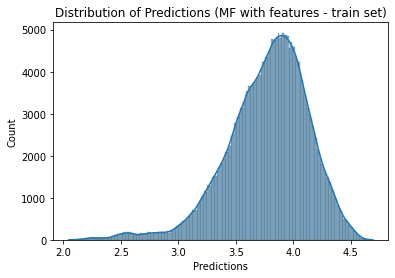

In [94]:
# Convert tensor into list
predictions = [tensor.item() for tensor in predicted_ratings]

# Plotting the distribution
sns.histplot(predictions, kde=True)
plt.title("Distribution of Predictions (MF with features - train set)")
plt.xlabel("Predictions")
plt.ylabel("Count")
plt.show()

In [ ]:
test_df_['AuthorCountRank'] = pd.factorize(test_df_['AuthorCountCat'])[0]
test_df_['ReviewCountRank'] = pd.factorize(test_df_['ReviewCountCat'])[0]


In [ ]:
def test_model(model, df, unsqueeze=False):
    model.eval()
    with torch.no_grad():
        users = torch.LongTensor(df.user_id.values)
        items = torch.LongTensor(df.item_id.values)
        languages = torch.LongTensor(df.Language_cat.values)
        popularity_groups = torch.LongTensor(df['AuthorCountRank'].values)
        review_count_groups = torch.LongTensor(df['ReviewCountRank'].values)
        if unsqueeze:
            ratings = ratings.unsqueeze(1)
        y_hat = model(users, items, languages, popularity_groups, review_count_groups)
    return y_hat


In [ ]:
pred = test_model(model, test_df_)

In [ ]:
pred_list = [tensor.item() for tensor in pred]

In [ ]:
test_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56199 entries, 0 to 56198
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               56199 non-null  int64   
 1   user_id          56199 non-null  int64   
 2   item_id          56199 non-null  int64   
 3   book_name        56199 non-null  object  
 4   rating           56199 non-null  float64 
 5   CountsOfReview   56199 non-null  float64 
 6   Rating           56199 non-null  float64 
 7   Language_cat     56199 non-null  float64 
 8   AuthorBookCount  56199 non-null  float64 
 9   AuthorCountCat   56199 non-null  category
 10  ReviewCountCat   56199 non-null  category
 11  AuthorCountRank  56199 non-null  int64   
 12  ReviewCountRank  56199 non-null  int64   
dtypes: category(2), float64(5), int64(5), object(1)
memory usage: 5.3+ MB


In [ ]:
test_df_["rating"] = pred_list

In [ ]:
# 0.77887

test_df_[["ID", "rating"]].to_csv(FolderPath + "MF_withfeatures.csv", index = False)

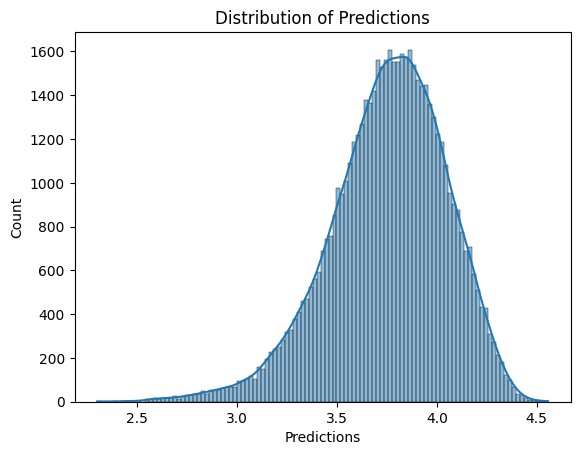

In [ ]:
predictions = pred_list

# Plotting the distribution of prediction result on trainset
sns.histplot(predictions, kde=True)
plt.title("Distribution of Predictions")
plt.xlabel("Predictions")
plt.ylabel("Count")
plt.show()

#